In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
import operator

## I HAVEF TO WORK ON THIS
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.


## Data

In [2]:
csv_path = r"C:\Users\sofia.martinez_bluet\Downloads\bottle.csv"

# Verificar si el archivo existe en la ruta especificada
if os.path.exists(csv_path):
    # Leer el archivo CSV
    data = pd.read_csv(csv_path)
    # Mostrar las primeras filas del DataFrame para verificar
    print(data.head())
else:
    print(f"El archivo {csv_path} no se encuentra en la ruta especificada.")

   Cst_Cnt  Btl_Cnt       Sta_ID                                Depth_ID  \
0        1        1  054.0 056.0  19-4903CR-HY-060-0930-05400560-0000A-3   
1        1        2  054.0 056.0  19-4903CR-HY-060-0930-05400560-0008A-3   
2        1        3  054.0 056.0  19-4903CR-HY-060-0930-05400560-0010A-7   
3        1        4  054.0 056.0  19-4903CR-HY-060-0930-05400560-0019A-3   
4        1        5  054.0 056.0  19-4903CR-HY-060-0930-05400560-0020A-7   

   Depthm  T_degC  Salnty  O2ml_L  STheta  O2Sat  ...  R_PHAEO  R_PRES  \
0       0   10.50  33.440     NaN  25.649    NaN  ...      NaN       0   
1       8   10.46  33.440     NaN  25.656    NaN  ...      NaN       8   
2      10   10.46  33.437     NaN  25.654    NaN  ...      NaN      10   
3      19   10.45  33.420     NaN  25.643    NaN  ...      NaN      19   
4      20   10.45  33.421     NaN  25.643    NaN  ...      NaN      20   

   R_SAMP  DIC1  DIC2  TA1  TA2  pH2  pH1  DIC Quality Comment;  
0     NaN   NaN   NaN  NaN  NaN 

In [3]:
data.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,10000.000000,10000.000000,10000.000000,8964.000000,2914.000000,6751.000000,2594.000000,1638.000000,1638.000000,0.0,...,0.0,0.0,10000.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,3223.249900,96084.696400,342.066200,9.102052,34.052861,2.549643,26.035024,38.998107,97.127660,NaN,...,NaN,NaN,344.989700,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,143.093101,3844.983829,377.172407,4.563639,0.565819,1.996923,1.327739,38.170300,89.894108,NaN,...,NaN,NaN,381.002138,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,1.000000,0.000000,1.600000,32.170000,0.100000,22.040000,1.500000,4.348766,NaN,...,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,3122.000000,93648.750000,50.000000,5.470000,33.559250,0.530000,25.031000,5.200000,15.650063,NaN,...,NaN,NaN,50.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,3216.000000,96148.500000,198.000000,8.410000,34.205500,2.170000,26.494000,18.150000,53.041795,NaN,...,NaN,NaN,200.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,3322.000000,98648.250000,537.250000,11.330000,34.530000,4.555000,27.125000,84.700000,191.530475,NaN,...,NaN,NaN,541.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,3435.000000,101148.000000,3300.000000,28.540000,35.120000,7.600000,27.846000,122.600000,322.767500,NaN,...,NaN,NaN,3346.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Extract 2 columns 'T_degC','Salnty' for pure and better showing
data_df = data[['T_degC','Salnty']]
# And called again
data_df.columns = ['Temperature', 'Salinity']

bottle_df = data_df[:][:500]      # lets take limit for speed regression calculating
bottle_df.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


### Preprocessing

In [5]:
# see how many null values we have
bottle_df.isnull().sum()

Temperature     68
Salinity       101
dtype: int64

In [6]:

# Drop NaN or missing input numbers

bottle_df.fillna(method='ffill', inplace=True)
#bottle_df.isnull().sum()
# Features chose

X = np.array(bottle_df['Salinity']).reshape(-1, 1)
y = np.array(bottle_df['Temperature']).reshape(-1, 1)
# Split data as %20 is test and %80 is train set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

## Linear Regression

In [7]:
from sklearn.linear_model import LinearRegression

lin_df = LinearRegression()  
lin_df.fit(X_train, y_train)

dt_predict = lin_df.predict(X_test)                                     # Predict Linear Model


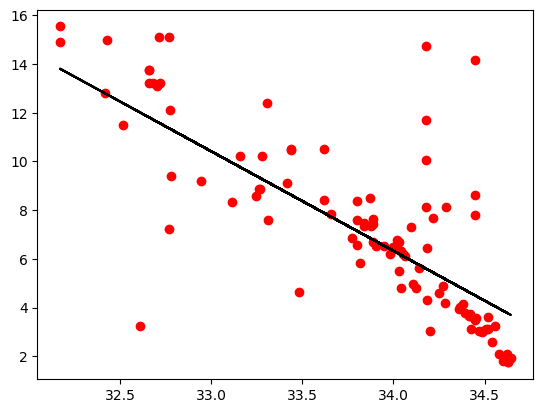

In [9]:
##### VISUALIZATION ###

# Finally draw figure of Linear Regression Model

plt.scatter(X_test, y_test, color='r')
plt.plot(X_test, dt_predict, color='black')
plt.show()

In [10]:
####### MEASURES ######

from tabulate import tabulate
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate regression metrics
mae = mean_absolute_error(y_test, dt_predict)
mse = mean_squared_error(y_test, dt_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, dt_predict)

# Create a table
table = [["Mean Absolute Error (MAE)", mae],
         ["Mean Squared Error (MSE)", mse],
         ["Root Mean Squared Error (RMSE)", rmse],
         ["Coefficient of Determination (R²)", r2]]

# Print the table
print(tabulate(table, headers=["Metric", "Value"], tablefmt="fancy_grid"))

╒═══════════════════════════════════╤══════════╕
│ Metric                            │    Value │
╞═══════════════════════════════════╪══════════╡
│ Mean Absolute Error (MAE)         │ 1.58271  │
├───────────────────────────────────┼──────────┤
│ Mean Squared Error (MSE)          │ 5.49709  │
├───────────────────────────────────┼──────────┤
│ Root Mean Squared Error (RMSE)    │ 2.34459  │
├───────────────────────────────────┼──────────┤
│ Coefficient of Determination (R²) │ 0.602775 │
╘═══════════════════════════════════╧══════════╛
